In [1]:
from arcgis.gis import GIS
gis = GIS('https://python.playground.esri.com/portal', 'arcgis_python', 'amazing_arcgis_123')

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri_livingatlas>
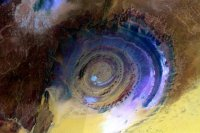

In [2]:
landsat_item = gis.content.search('Multispectral Landsat', 'Imagery Layer', outside_org=True)[0]
landsat_item

In [4]:
landsat = landsat_item.layers[0]
from arcgis.geocoding import geocode
area = geocode('Houston, TX', out_sr=landsat.properties.spatialReference)[0]

#### Image attributes

In [5]:
from arcgis.geometry import Geometry
houston_mask = Geometry(area['extent'])

In [6]:
samples = landsat.get_samples(houston_mask, sample_count=50,
        out_fields='AcquisitionDate,OBJECTID,GroupName,Category,SunAzimuth,SunElevation,CloudCover')

In [16]:
samples[0].keys()

dict_keys(['location', 'locationId', 'value', 'rasterId', 'resolution', 'attributes'])

In [25]:
samples[4]

{'attributes': {'AcquisitionDate': 'Acquisition Date: 15 May, 2017',
  'Category': 1,
  'CloudCover': 0.0263,
  'GroupName': 'LC80260392017135LGN00_MTL',
  'OBJECTID': 494747,
  'SunAzimuth': 115.3955,
  'SunElevation': 67.65093},
 'location': {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
  'x': -10601548.654915033,
  'y': 3513758.5364938597},
 'locationId': 4,
 'rasterId': 494747,
 'resolution': 30,
 'value': '0 0 0 0 0 0 0 0'}

In [8]:
import datetime
value = samples[0]['attributes']['AcquisitionDate']
datetime.datetime.fromtimestamp(value /1000).strftime("Acquisition Date: %d %b, %Y")

'Acquisition Date: 15 May, 2017'

In [21]:
import pandas as pd
column_names = 'AcquisitionDate,OBJECTID,GroupName,Category,SunAzimuth,SunElevation,CloudCover'.split(',')

sample_list = []
for s in samples:
    sa = s['attributes']
    sa['AcquisitionDate'] = datetime.datetime.fromtimestamp(sa['AcquisitionDate'] /1000).strftime("Acquisition Date: %d %b, %Y")
    sample_list.append(sa)
    
pd.DataFrame.from_records(sample_list)

,AcquisitionDate,Category,CloudCover,GroupName,OBJECTID,SunAzimuth,SunElevation
0,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093
1,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093
2,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093
3,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093
4,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093
5,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093
6,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093
7,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093
8,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093
9,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093


In [30]:
import arcgis
houston_mask2=arcgis.geometry.filters.intersects(area['extent'])
houston_mask2

{'geometry': {"xmin": -10657358.467838574, "ymin": 3425835.95968719, "xmax": -10575649.96159631, "ymax": 3519959.6268186974},
 'geometryType': 'esriGeometryEnvelope',
 'spatialRel': 'esriSpatialRelIntersects'}

In [69]:
houston_images = landsat.filter_by(where="(Category = 1) AND (CloudCover <=0.01)",geometry=houston_mask2)

In [70]:
fs = houston_images.query(out_fields="AcquisitionDate, GroupName, Best, CloudCover, WRS_Row, Month, Name", 
              return_geometry=True,
              return_distinct_values=False,
              order_by_fields="AcquisitionDate")

In [71]:
df = fs.df

In [72]:
df['Time'] = pd.to_datetime(df['AcquisitionDate'], unit='ms')
df['Time'].head(10)

0   1972-11-26
1   1973-05-08
2   1976-04-21
3   1976-10-01
4   1988-04-13
5   1990-12-08
6   1990-12-08
7   1992-10-01
8   1999-10-06
9   1999-10-06
Name: Time, dtype: datetime64[ns]

In [73]:
df['Time']

0    1972-11-26 00:00:00.000
1    1973-05-08 00:00:00.000
2    1976-04-21 00:00:00.000
3    1976-10-01 00:00:00.000
4    1988-04-13 00:00:00.000
5    1990-12-08 00:00:00.000
6    1990-12-08 00:00:00.000
7    1992-10-01 00:00:00.000
8    1999-10-06 00:00:00.000
9    1999-10-06 00:00:00.000
10   2001-04-25 00:00:00.000
11   2001-04-25 00:00:00.000
12   2005-10-06 00:00:00.000
13   2005-10-22 00:00:00.000
14   2006-05-17 00:00:00.000
15   2006-06-10 00:00:00.000
16   2010-04-26 00:00:00.000
17   2010-05-05 00:00:00.000
18   2010-05-05 00:00:00.000
19   2010-05-28 00:00:00.000
20   2013-08-17 16:53:03.337
21   2013-10-20 16:52:27.664
22   2014-03-20 16:57:14.646
23   2014-10-14 16:57:03.145
24   2014-10-14 16:57:27.033
25   2014-11-24 16:50:49.583
26   2015-01-27 16:50:35.882
27   2015-01-27 16:50:59.775
28   2015-03-23 16:56:21.837
29   2015-07-29 16:56:26.297
30   2015-10-01 16:56:50.407
31   2015-10-01 16:57:14.304
32   2015-10-10 16:50:39.462
33   2015-10-17 16:56:50.802
34   2015-11-1

In [74]:
m = gis.map('Houston, TX', 7)
display(m)
# m.add_layer(selected.last())

In [75]:
m.add_layer(houston_images.last())

In [42]:
m2 = gis.map('Houston, TX', 7)
display(m2)

In [43]:
m2.add_layer(houston_images.first())

In [76]:
i1 = houston_images.first()

In [77]:
df

,AcquisitionDate,Best,CloudCover,GroupName,Month,Name,OBJECTID,Shape_Area,Shape_Length,WRS_Row,SHAPE,Time
0,91584000000,95974040,-0.0100,p026r040_1x19721126,11,p026r040_1dm19721126_z15_MS,587581,4.429490e+10,842699.927939,40,"{'rings': [[[-10371069.3833, 3437310.500200003...",1972-11-26 00:00:00.000
1,105667200000,95973040,-0.0100,p027r040_1x19730508,5,p027r040_1dm19730508_z15_MS,587611,4.445619e+10,844235.219356,40,"{'rings': [[[-10548081.1085, 3449095.069600001...",1973-05-08 00:00:00.000
2,198892800000,95974039,-0.0100,p026r039_1x19760421,4,p026r039_1dm19760421_z15_MS,587580,4.570560e+10,855970.246625,39,"{'rings': [[[-10338972.2753, 3637198.9177], [-...",1976-04-21 00:00:00.000
3,212976000000,95973039,-0.0100,p027r039_1x19761001,10,p027r039_1dm19761001_z15_MS,587610,4.649798e+10,863100.050825,39,"{'rings': [[[-10497636.9144, 3624681.193499997...",1976-10-01 00:00:00.000
4,576892800000,91974040,-0.0100,p026r040_5x19880413,4,p026r040_5dt19880413_z14_MS,579811,4.126443e+10,813205.059168,40,"{'rings': [[[-10669192.8154, 3308967.976599999...",1988-04-13 00:00:00.000
5,660614400000,91975039,-0.0100,p025r039_5x19901208,12,p025r039_5dt19901208_z15_MS,579785,4.269800e+10,827189.871861,39,"{'rings': [[[-10456220.5531, 3492354.653700001...",1990-12-08 00:00:00.000
6,660614400000,91975040,-0.0100,p025r040_5x19901208,12,p025r040_5dt19901208_z15_MS,579786,4.151359e+10,815657.749748,40,"{'rings': [[[-10499092.5224, 3309577.357200000...",1990-12-08 00:00:00.000
7,717897600000,91974039,-0.0100,p026r039_5x19921001,10,p026r039_5dt19921001_z14_MS,579810,4.284116e+10,828561.332296,39,"{'rings': [[[-10632149.6621, 3492827.401900001...",1992-10-01 00:00:00.000
8,939168000000,88975039,0.0000,p025r039_7x19991006,10,p025r039_7dt19991006_z15_MS,570457,4.216314e+10,822015.263032,39,"{'rings': [[[-10431162.3372, 3627491.404399998...",1999-10-06 00:00:00.000
9,939168000000,88975040,0.0000,p025r040_7x19991006,10,p025r040_7dt19991006_z15_MS,570458,4.098700e+10,810467.729645,40,"{'rings': [[[-10474800.721, 3442352.4103000015...",1999-10-06 00:00:00.000


In [78]:
pre_harvey = landsat.filter_by('OBJECTID=499759')
post_harvey = landsat.filter_by('OBJECTID=466640')

In [79]:
from arcgis.raster.functions import *

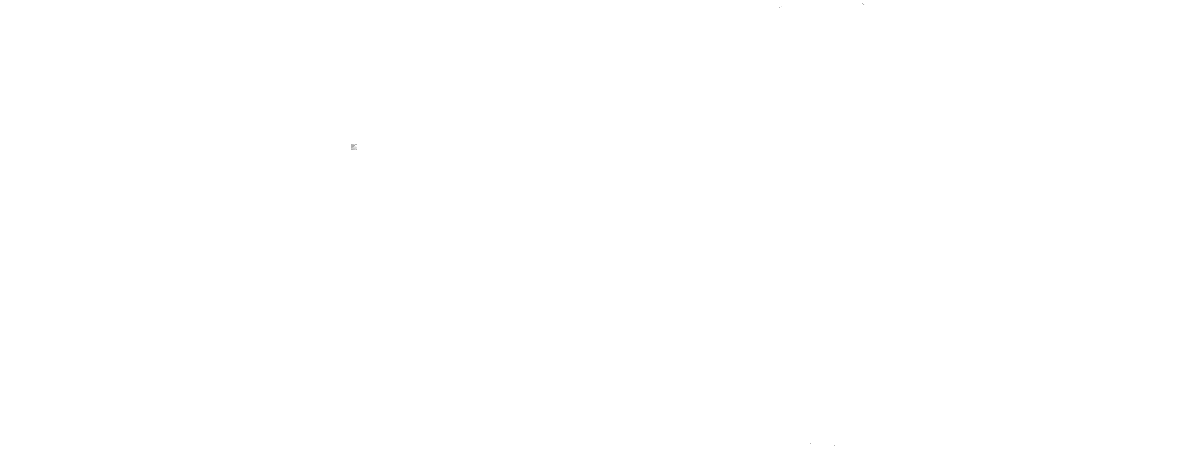

In [80]:
diff = pre_harvey - post_harvey
diff

In [81]:
m3 = gis.map('Houston, TX')
m3

In [83]:
m3.add_layer(diff2)

In [82]:
diff2 = stretch(diff,stretch_type='Sigmoid',dra=True, astype='u8')